# 마키아벨리즘 문제순서제외 전체문항 답변시간 + tvm score 와 voted

## 세계 데이터 AVG 평균 성인 이상 기준, nan, 0 제외

In [138]:
df = pd.read_csv('../MACH_data/cut_off_by_avg_over_18age.csv')
df

,Unnamed: 0,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
0,0,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,...,Agnostic,Heterosexual,White,No,Never married,2,91.0,37.0,45.0,9.0
1,2,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,...,Christian(Protestant),Heterosexual,White,Yes,Previously married,2,78.0,37.0,36.0,5.0
2,3,5.0,13.0,9.0,5.0,7.0,5.0,2.0,19.0,9.0,...,Christian(Catholic),Homosexual,White,Yes,Never married,2,85.0,35.0,41.0,9.0
3,5,3.0,11.0,4.0,3.0,10.0,4.0,2.0,17.0,5.0,...,Atheist,Heterosexual,White,Yes,Never married,2,66.0,28.0,31.0,7.0
4,6,4.0,6.0,11.0,4.0,15.0,4.0,3.0,2.0,11.0,...,Agnostic,Heterosexual,Asian,No,Never married,1,77.0,35.0,35.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44562,53015,4.0,15.0,5.0,1.0,16.0,5.0,1.0,10.0,5.0,...,Agnostic,Homosexual,White,Yes,Never married,3,83.0,42.0,34.0,7.0
44563,53016,5.0,1.0,10.0,5.0,13.0,5.0,4.0,15.0,11.0,...,Other,Heterosexual,Asian,No,Never married,1,64.0,31.0,26.0,7.0
44564,53017,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
44565,53018,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0


In [141]:
b = ['score', 'v_score', 't_score', 'm_score', "voted"]

In [143]:
df1 = df[b]
df1

,score,v_score,t_score,m_score,voted
0,91.0,37.0,45.0,9.0,No
1,78.0,37.0,36.0,5.0,Yes
2,85.0,35.0,41.0,9.0,Yes
3,66.0,28.0,31.0,7.0,Yes
4,77.0,35.0,35.0,7.0,No
...,...,...,...,...,...
44562,83.0,42.0,34.0,7.0,Yes
44563,64.0,31.0,26.0,7.0,No
44564,59.0,28.0,26.0,5.0,No
44565,90.0,37.0,43.0,10.0,No


### automl non scaler

In [144]:
clf = setup(data = df1, target = 'voted')

Setup Succesfully Completed!


,Description,Value
0,session_id,7246
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(44567, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [145]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5404,0.5433,0.7706,0.5442,0.6379,0.0575,0.0643
1,0.5272,0.5273,0.7303,0.5368,0.6188,0.0335,0.0363
2,0.5314,0.5426,0.7621,0.5381,0.6308,0.0391,0.0437
3,0.5253,0.5325,0.7517,0.5343,0.6246,0.0271,0.0301
4,0.5519,0.5523,0.7932,0.5511,0.6503,0.0800,0.0908
5,0.5343,0.5442,0.7505,0.5409,0.6287,0.0465,0.0511
6,0.5242,0.5269,0.7076,0.5356,0.6097,0.0295,0.0314
7,0.5390,0.5458,0.7747,0.5428,0.6383,0.0541,0.0610
8,0.5377,0.5460,0.7883,0.5413,0.6418,0.0496,0.0571
9,0.5351,0.5373,0.7364,0.5425,0.6247,0.0495,0.0537


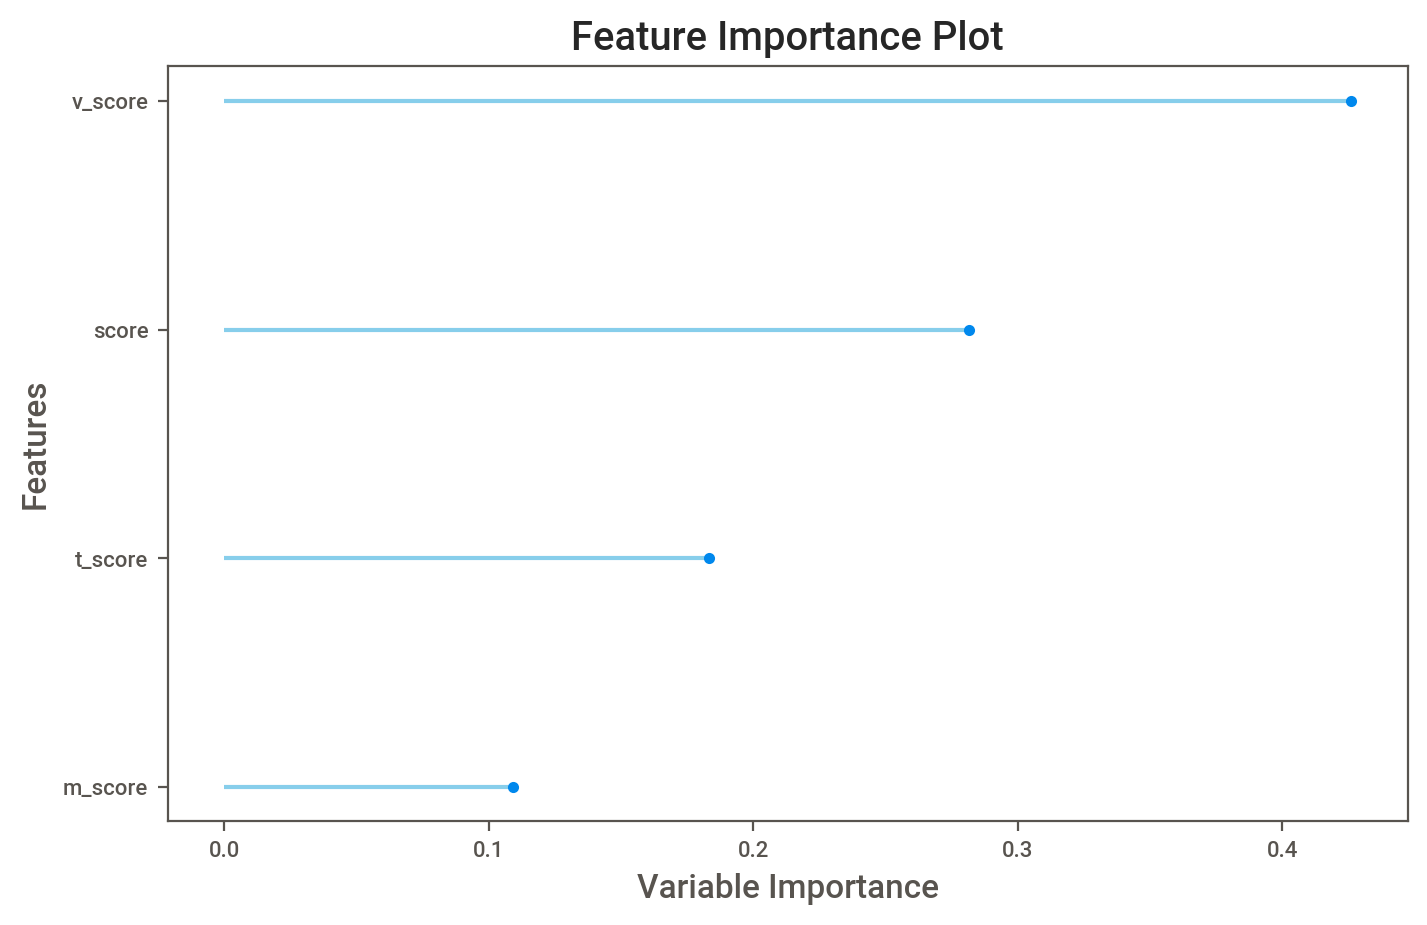

In [146]:
plot_model(estimator = gbc, plot = 'feature')

In [181]:
def score_check(x):
    df2 = df1[[x, "voted"]]
    df2["count"] = 1
    df3 = df2.pivot_table(index=x, columns="voted", values="count", aggfunc="count")
    return df3.plot(kind="line")

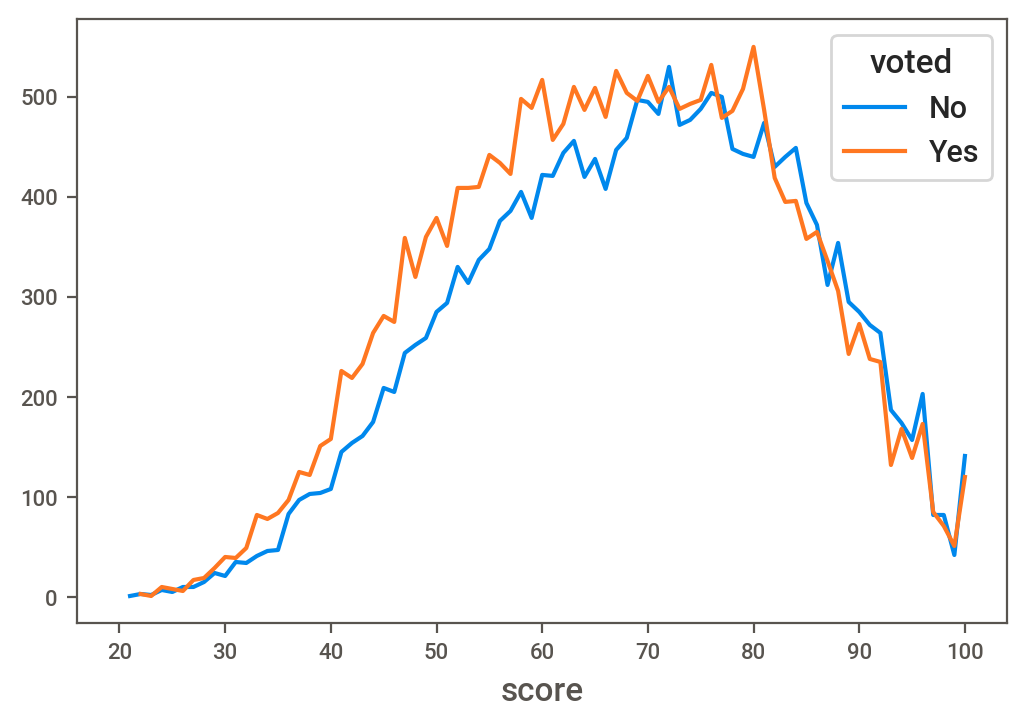

In [182]:
score_check("score")

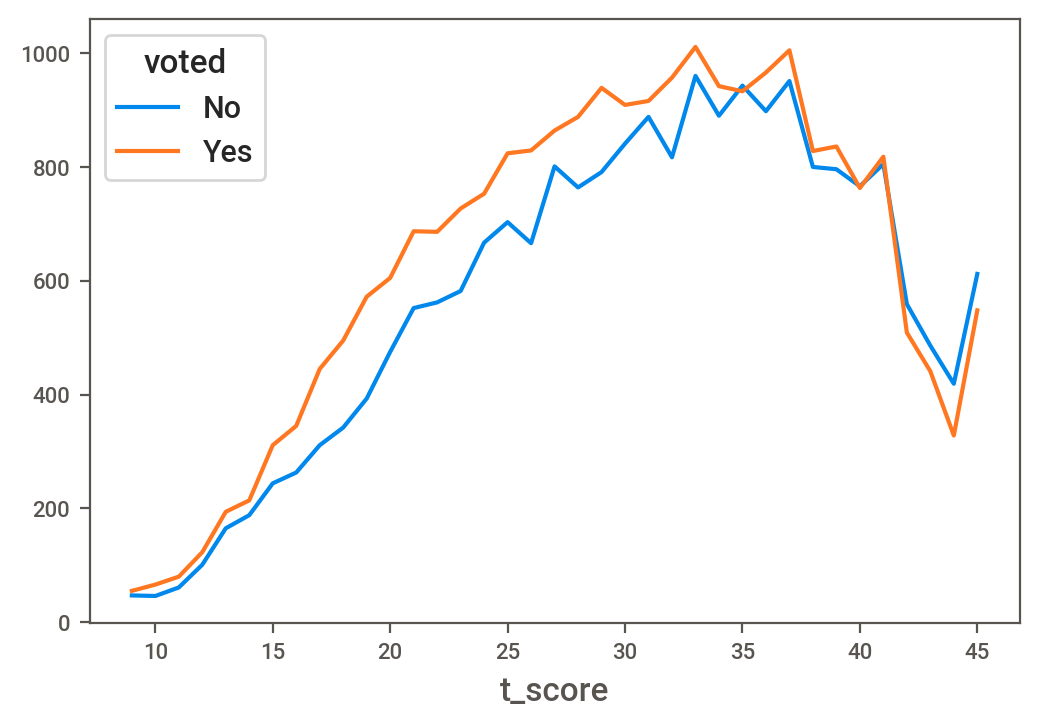

In [183]:
score_check("t_score")

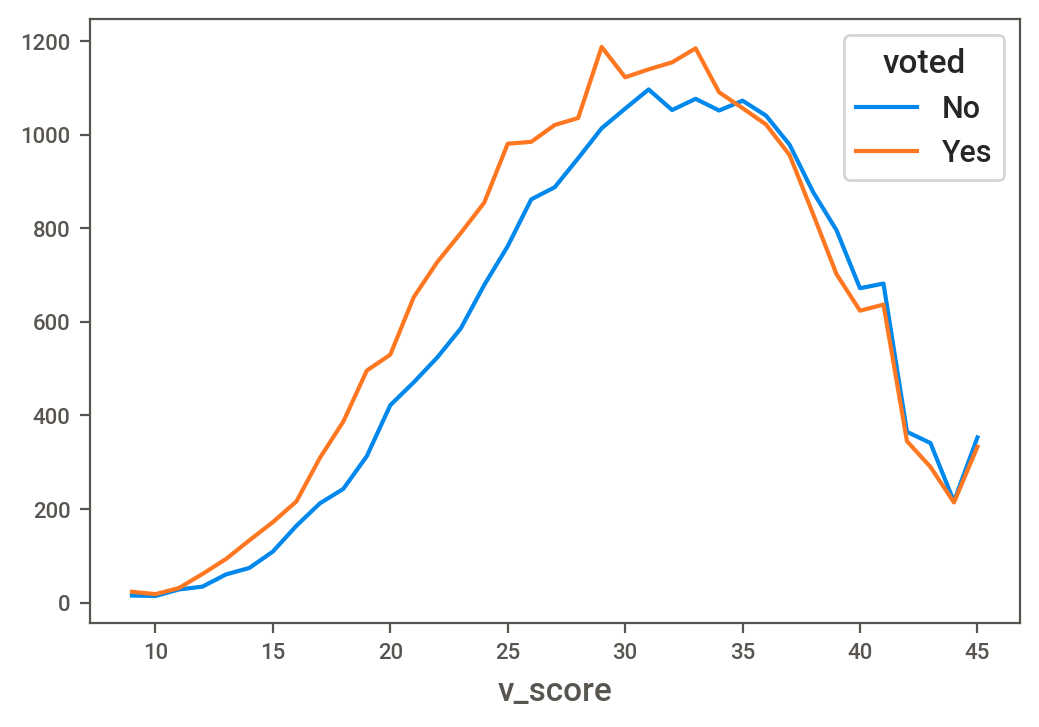

In [184]:
score_check("v_score")

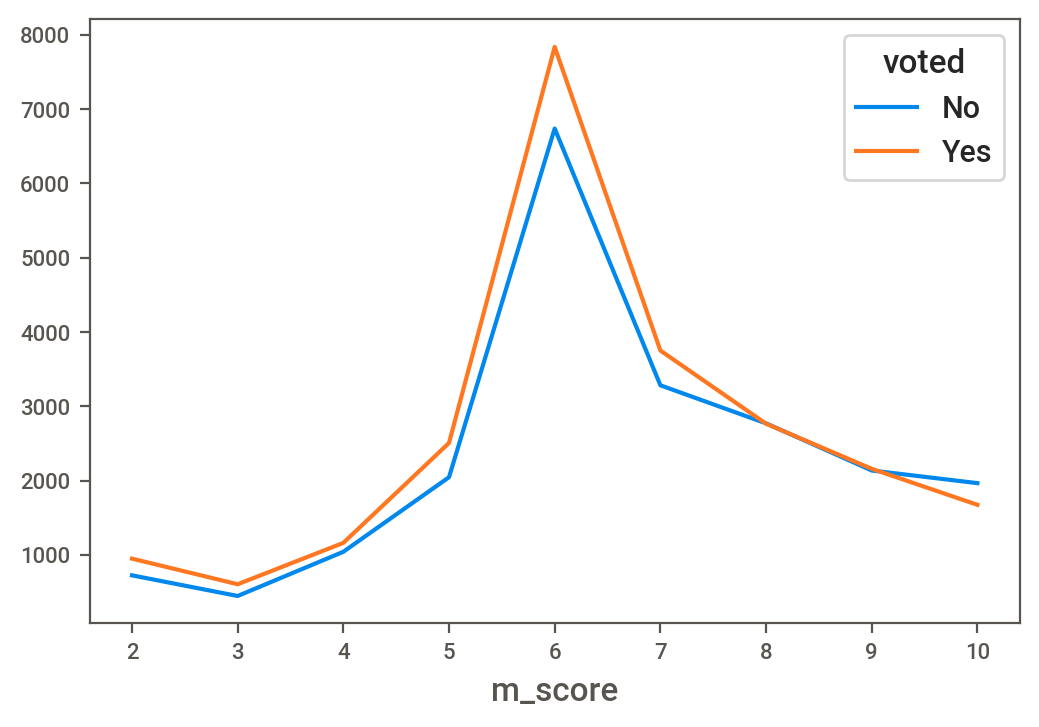

In [185]:
score_check("m_score")

In [175]:
df2["count"] = 1

In [176]:
df2

,v_score,voted,count
0,37.0,No,1
1,37.0,Yes,1
2,35.0,Yes,1
3,28.0,Yes,1
4,35.0,No,1
...,...,...,...
44562,42.0,Yes,1
44563,31.0,No,1
44564,28.0,No,1
44565,37.0,No,1


In [178]:
df3 = df2.pivot_table(index="v_score", columns="voted", values="count", aggfunc="count")
df3

voted,No,Yes
v_score,,
9.0,15,23
10.0,14,18
11.0,28,31
12.0,34,61
13.0,60,93
14.0,74,133
15.0,109,172
16.0,164,216
17.0,212,309


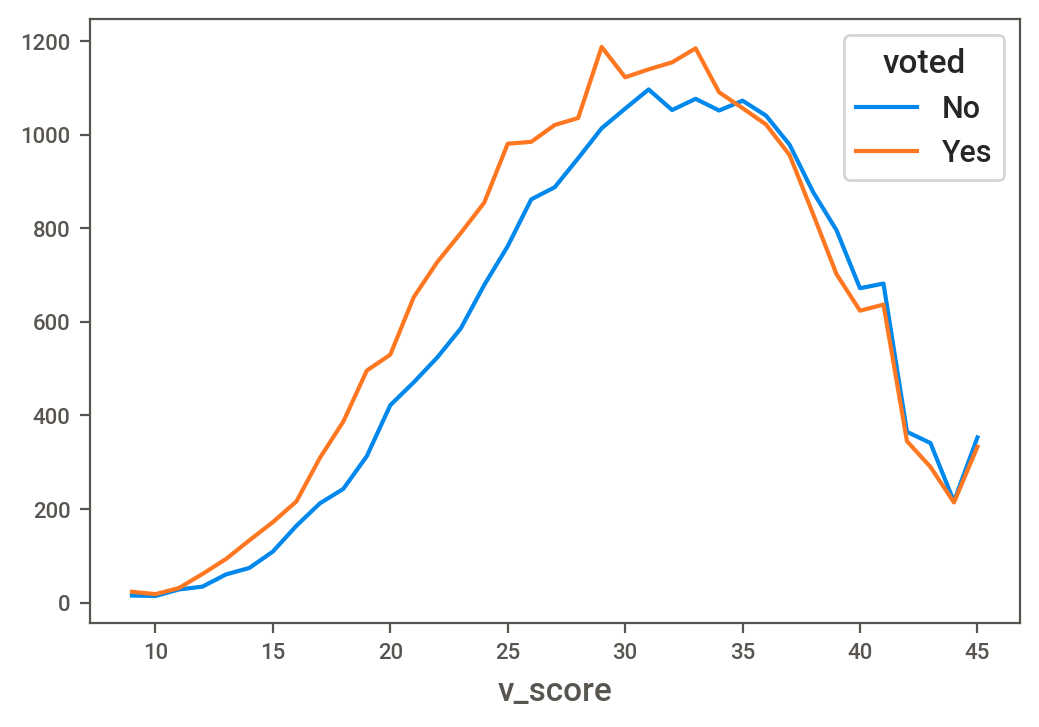

In [180]:
df3.plot(kind="line")

In [153]:
df3 = df2.groupby("v_score").count()
df3

,voted
v_score,
9.0,38
10.0,32
11.0,59
12.0,95
13.0,153
14.0,207
15.0,281
16.0,380
17.0,521


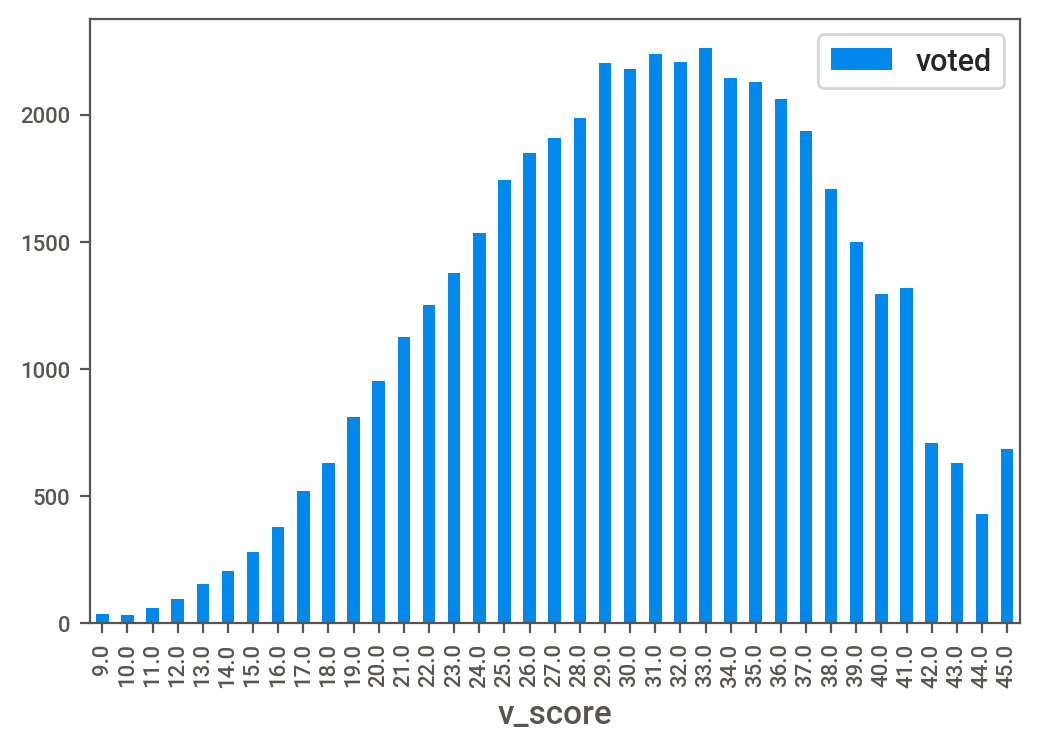

In [154]:
df3.plot(kind="bar")

In [161]:
df3 = df2.groupby("v_score")["Yes", "No"].count()
df3

KeyError: "Columns not found: 'Yes', 'No'"

In [156]:
df2

,v_score,voted
0,37.0,No
1,37.0,Yes
2,35.0,Yes
3,28.0,Yes
4,35.0,No
...,...,...
44562,42.0,Yes
44563,31.0,No
44564,28.0,No
44565,37.0,No


In [ ]:
boy_df = boy_df.pivot_table(index = 'age_group', columns='F_code', values = 'SPEC_ID_SNO', aggfunc='count', margins=True)

In [159]:
df2.pivot_table(columns="voted", index="v_score", aggfunc='count', margins=True)

TypeError: 'str' object is not callable

### automl non scaler

In [108]:
from pycaret.classification import *

In [114]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data = df, target = 'voted')

Setup Succesfully Completed!


,Description,Value
0,session_id,6704
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(44567, 109)"
4,Missing Values,False
5,Numeric Features,71
6,Categorical Features,37
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


#### gbc

In [116]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6516,0.7158,0.7486,0.6451,0.6930,0.2954,0.2998
1,0.6516,0.7168,0.7517,0.6444,0.6939,0.2952,0.2999
2,0.6365,0.7035,0.7309,0.6335,0.6788,0.2652,0.2688
3,0.6455,0.7106,0.7529,0.6377,0.6905,0.2823,0.2876
4,0.6388,0.7092,0.7523,0.6310,0.6863,0.2682,0.2740
5,0.6526,0.7155,0.7657,0.6419,0.6984,0.2961,0.3025
6,0.6444,0.7139,0.7346,0.6411,0.6847,0.2814,0.2848
7,0.6749,0.7464,0.7706,0.6644,0.7136,0.3425,0.3475
8,0.6502,0.7147,0.7436,0.6448,0.6907,0.2929,0.2969
9,0.6672,0.7308,0.7772,0.6542,0.7104,0.3260,0.3327


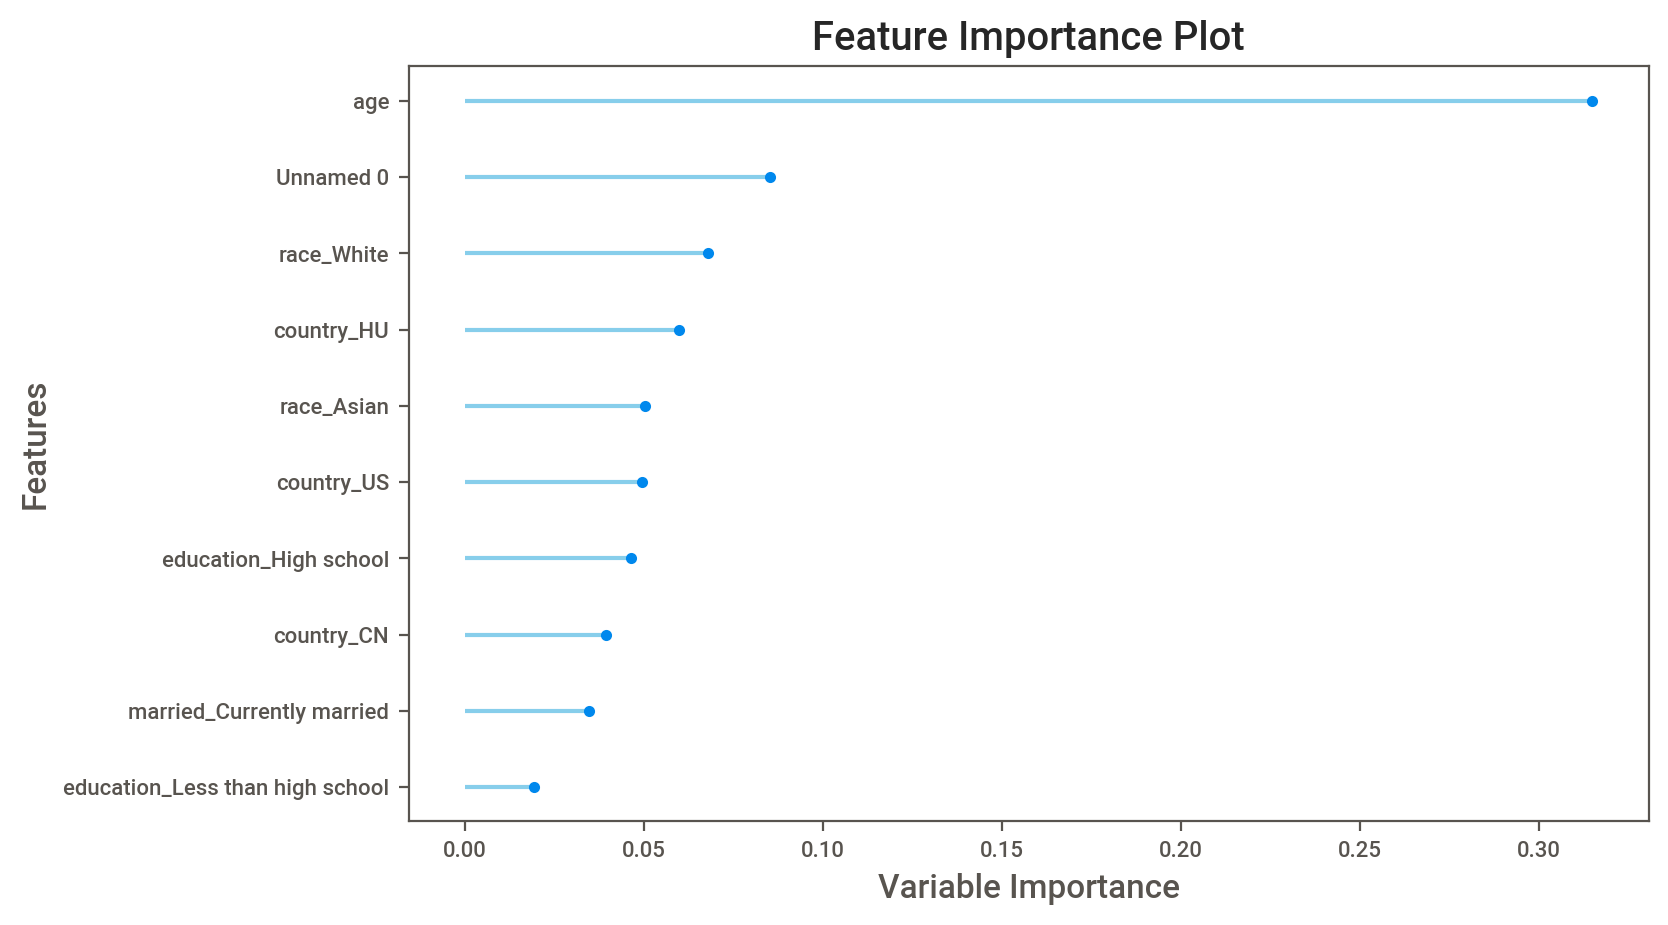

In [117]:
plot_model(estimator = gbc, plot = 'feature')

In [123]:
clf = setup(data = df, target = 'voted', normalize=True, normalize_method = "maxabs")

Setup Succesfully Completed!


,Description,Value
0,session_id,2710
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(44567, 109)"
4,Missing Values,False
5,Numeric Features,71
6,Categorical Features,37
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [124]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6375,0.7041,0.7352,0.6335,0.6806,0.2669,0.2708
1,0.6545,0.7214,0.7553,0.6465,0.6967,0.3009,0.3059
2,0.6583,0.7202,0.7608,0.6491,0.7006,0.3086,0.3139
3,0.6558,0.7160,0.7468,0.6500,0.6951,0.3042,0.3081
4,0.6465,0.7188,0.7535,0.6386,0.6913,0.2843,0.2896
5,0.6647,0.7227,0.7651,0.6548,0.7057,0.3217,0.3269
6,0.6544,0.7128,0.7468,0.6486,0.6943,0.3013,0.3052
7,0.6416,0.7058,0.7450,0.6356,0.6860,0.2745,0.2792
8,0.6630,0.7268,0.7503,0.6569,0.7005,0.3192,0.3229
9,0.6483,0.7103,0.7540,0.6402,0.6925,0.2881,0.2934


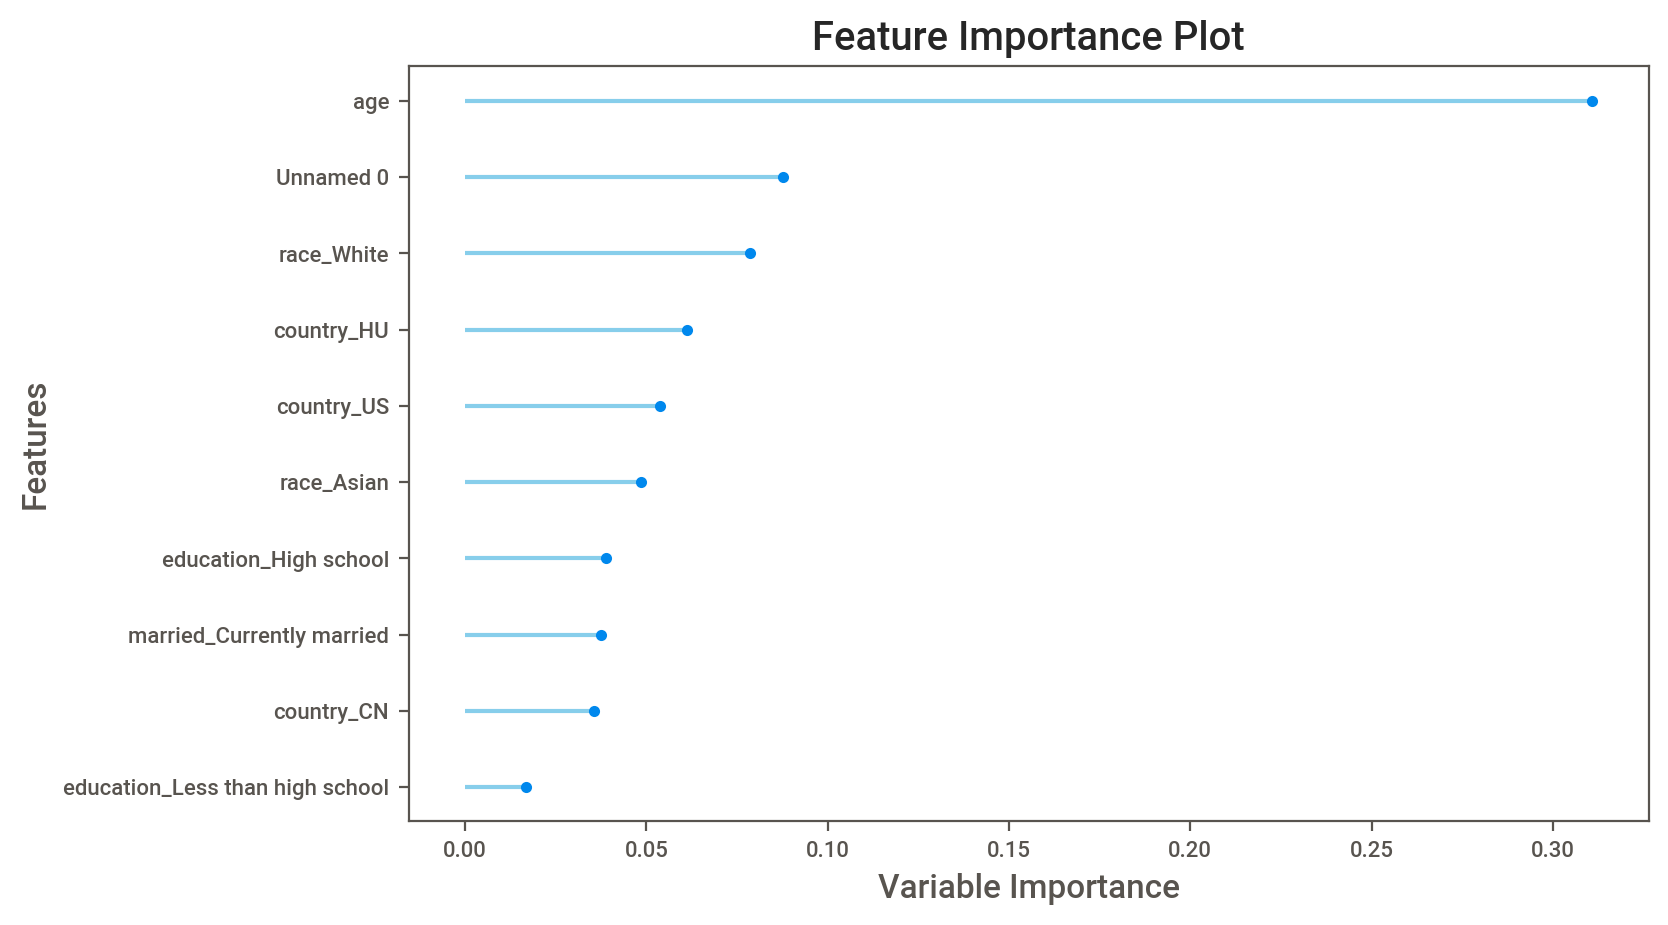

In [125]:
plot_model(estimator = gbc, plot = 'feature')

#### lgbm

In [126]:
ada=create_model("ada")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6381,0.6936,0.7254,0.6365,0.6781,0.2690,0.2720
1,0.6519,0.7157,0.7523,0.6445,0.6943,0.2958,0.3006
2,0.6548,0.7132,0.7401,0.6508,0.6925,0.3027,0.3060
3,0.6439,0.7104,0.7364,0.6400,0.6848,0.2802,0.2839
4,0.6420,0.7013,0.7346,0.6384,0.6831,0.2763,0.2799
5,0.6516,0.7131,0.7413,0.6470,0.6909,0.2959,0.2995
6,0.6467,0.7063,0.7358,0.6432,0.6864,0.2860,0.2894
7,0.6432,0.7001,0.7279,0.6414,0.6819,0.2792,0.2821
8,0.6470,0.7115,0.7234,0.6465,0.6828,0.2877,0.2900
9,0.6428,0.7025,0.7479,0.6360,0.6874,0.2771,0.2821


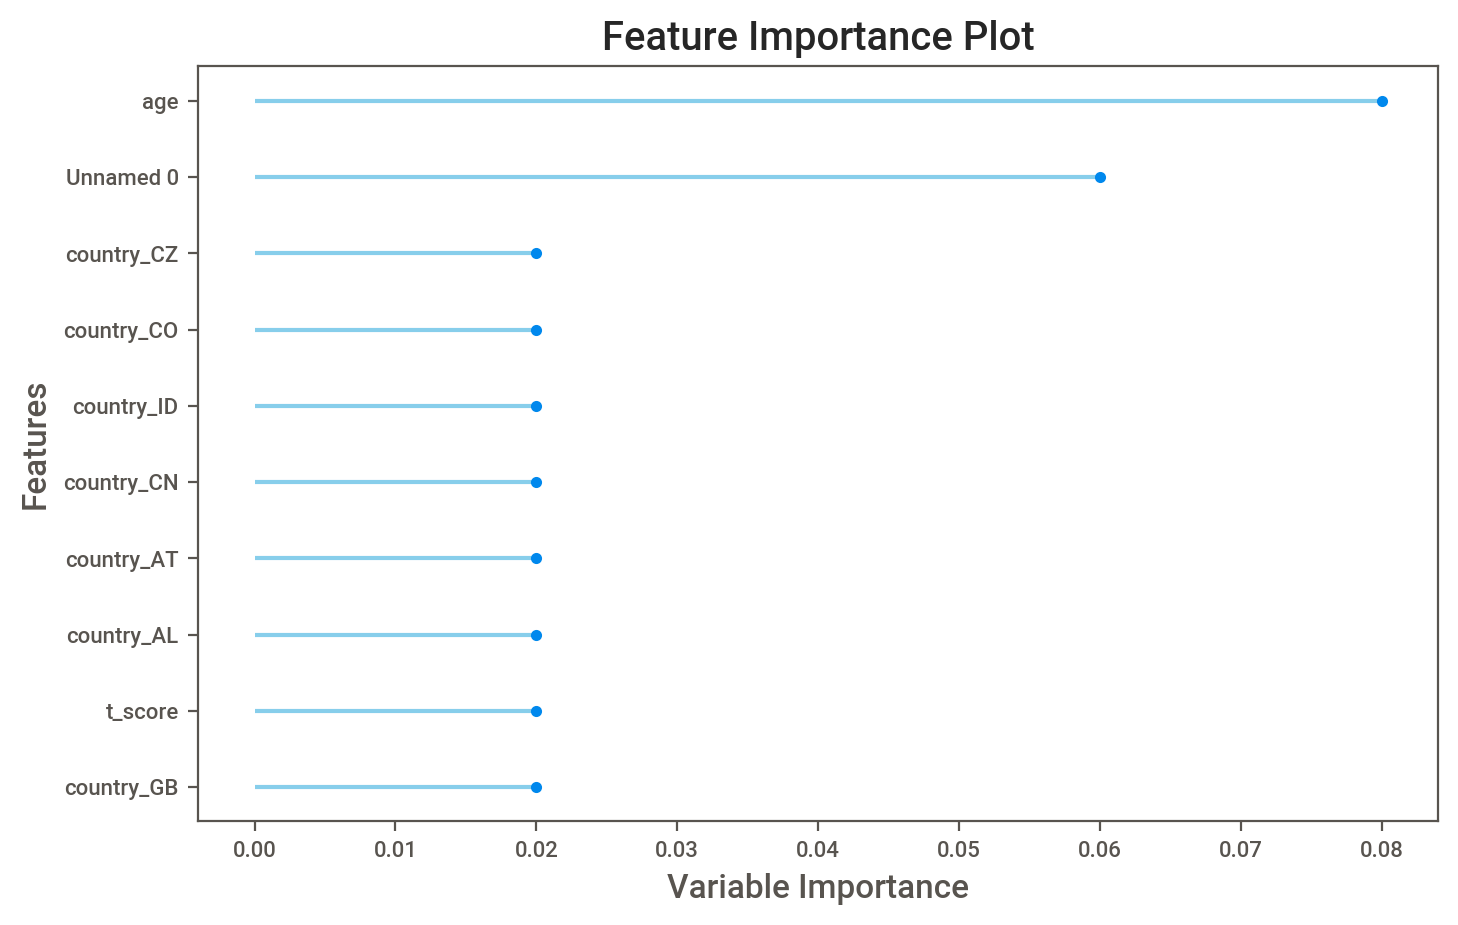

In [127]:
plot_model(estimator = ada, plot = 'feature')

In [131]:
df1 = df[["Unnamed: 0", "voted"]]
df1

,Unnamed: 0,voted
0,0,No
1,2,Yes
2,3,Yes
3,5,Yes
4,6,No
...,...,...
44562,53015,Yes
44563,53016,No
44564,53017,No
44565,53018,No


In [133]:
df1.pivot_table(values='Unnamed: 0', columns='voted', aggfunc="count")

voted,No,Yes
Unnamed: 0,21155,23412


In [136]:
df1.pivot_table(values='Unnamed: 0', columns='voted', aggfunc="sum")

voted,No,Yes
Unnamed: 0,584509805,588764680


In [137]:
df1.pivot_table(values='Unnamed: 0', columns='voted', aggfunc="mean")

voted,No,Yes
Unnamed: 0,27629.865516,25147.987357


In [128]:
df

,Unnamed: 0,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
0,0,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,...,Agnostic,Heterosexual,White,No,Never married,2,91.0,37.0,45.0,9.0
1,2,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,...,Christian(Protestant),Heterosexual,White,Yes,Previously married,2,78.0,37.0,36.0,5.0
2,3,5.0,13.0,9.0,5.0,7.0,5.0,2.0,19.0,9.0,...,Christian(Catholic),Homosexual,White,Yes,Never married,2,85.0,35.0,41.0,9.0
3,5,3.0,11.0,4.0,3.0,10.0,4.0,2.0,17.0,5.0,...,Atheist,Heterosexual,White,Yes,Never married,2,66.0,28.0,31.0,7.0
4,6,4.0,6.0,11.0,4.0,15.0,4.0,3.0,2.0,11.0,...,Agnostic,Heterosexual,Asian,No,Never married,1,77.0,35.0,35.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44562,53015,4.0,15.0,5.0,1.0,16.0,5.0,1.0,10.0,5.0,...,Agnostic,Homosexual,White,Yes,Never married,3,83.0,42.0,34.0,7.0
44563,53016,5.0,1.0,10.0,5.0,13.0,5.0,4.0,15.0,11.0,...,Other,Heterosexual,Asian,No,Never married,1,64.0,31.0,26.0,7.0
44564,53017,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
44565,53018,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0


# 마키아벨리즘a 문항 + T, V, M, score  와 voted 

## 세계 데이터 AVG 평균 성인 이상 기준, nan, 0 제외

In [100]:
df = pd.read_csv('../MACH_data/cut_off_by_avg_over_18age.csv')
df

,Unnamed: 0,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
0,0,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,...,Agnostic,Heterosexual,White,No,Never married,2,91.0,37.0,45.0,9.0
1,2,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,...,Christian(Protestant),Heterosexual,White,Yes,Previously married,2,78.0,37.0,36.0,5.0
2,3,5.0,13.0,9.0,5.0,7.0,5.0,2.0,19.0,9.0,...,Christian(Catholic),Homosexual,White,Yes,Never married,2,85.0,35.0,41.0,9.0
3,5,3.0,11.0,4.0,3.0,10.0,4.0,2.0,17.0,5.0,...,Atheist,Heterosexual,White,Yes,Never married,2,66.0,28.0,31.0,7.0
4,6,4.0,6.0,11.0,4.0,15.0,4.0,3.0,2.0,11.0,...,Agnostic,Heterosexual,Asian,No,Never married,1,77.0,35.0,35.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44562,53015,4.0,15.0,5.0,1.0,16.0,5.0,1.0,10.0,5.0,...,Agnostic,Homosexual,White,Yes,Never married,3,83.0,42.0,34.0,7.0
44563,53016,5.0,1.0,10.0,5.0,13.0,5.0,4.0,15.0,11.0,...,Other,Heterosexual,Asian,No,Never married,1,64.0,31.0,26.0,7.0
44564,53017,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
44565,53018,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0


### sweetbiz

### compare_report

> voted (투표 여부) 컬럼 기준으로 비교한 EDA 리포트

In [102]:
import sweetviz as sv

In [103]:
comint_rep = sv.compare_intra(df, df['voted'] == "Yes", ["Yes", "No"])

In [105]:
comint_rep.show_html('EDA_report_compare_raw_over18age_data.html')

Report EDA_report_compare_raw_over18age_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### age 와 voted 의 비교

In [23]:
df1 = df[["age","voted"]]
df1

,age,voted
0,18,No
1,31,Yes
2,20,Yes
3,19,Yes
4,37,No
...,...,...
44562,19,Yes
44563,22,No
44564,29,No
44565,20,No


In [24]:
def ages(x):
    if x <= 20:
        return "10s"
    elif x<=30:
        return "20s"
    elif x<=40:
        return "30s"
    elif x<=50:
        return "40s"
    elif x<=60:
        return "50s"
    elif x<=70:
        return "60s"
    else:
        return "70s"

In [25]:
df1["category"] = df1["age"].apply(ages)
df1

,age,voted,category
0,18,No,10s
1,31,Yes,30s
2,20,Yes,10s
3,19,Yes,10s
4,37,No,30s
...,...,...,...
44562,19,Yes,10s
44563,22,No,20s
44564,29,No,20s
44565,20,No,10s


In [27]:
df2 = df1.pivot_table(values='age', columns='voted', index="category", aggfunc="count")

voted,No,Yes
category,,
10s,5789,2941
20s,8600,9731
30s,3822,5271
40s,1913,3268
50s,769,1469
60s,223,623
70s,39,109


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    f_path = "/Library/Fonts/Arial Unicode.ttf"
elif platform.system() == 'Windows':
    f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)
print("Hangul font is set!")

Hangul font is set!


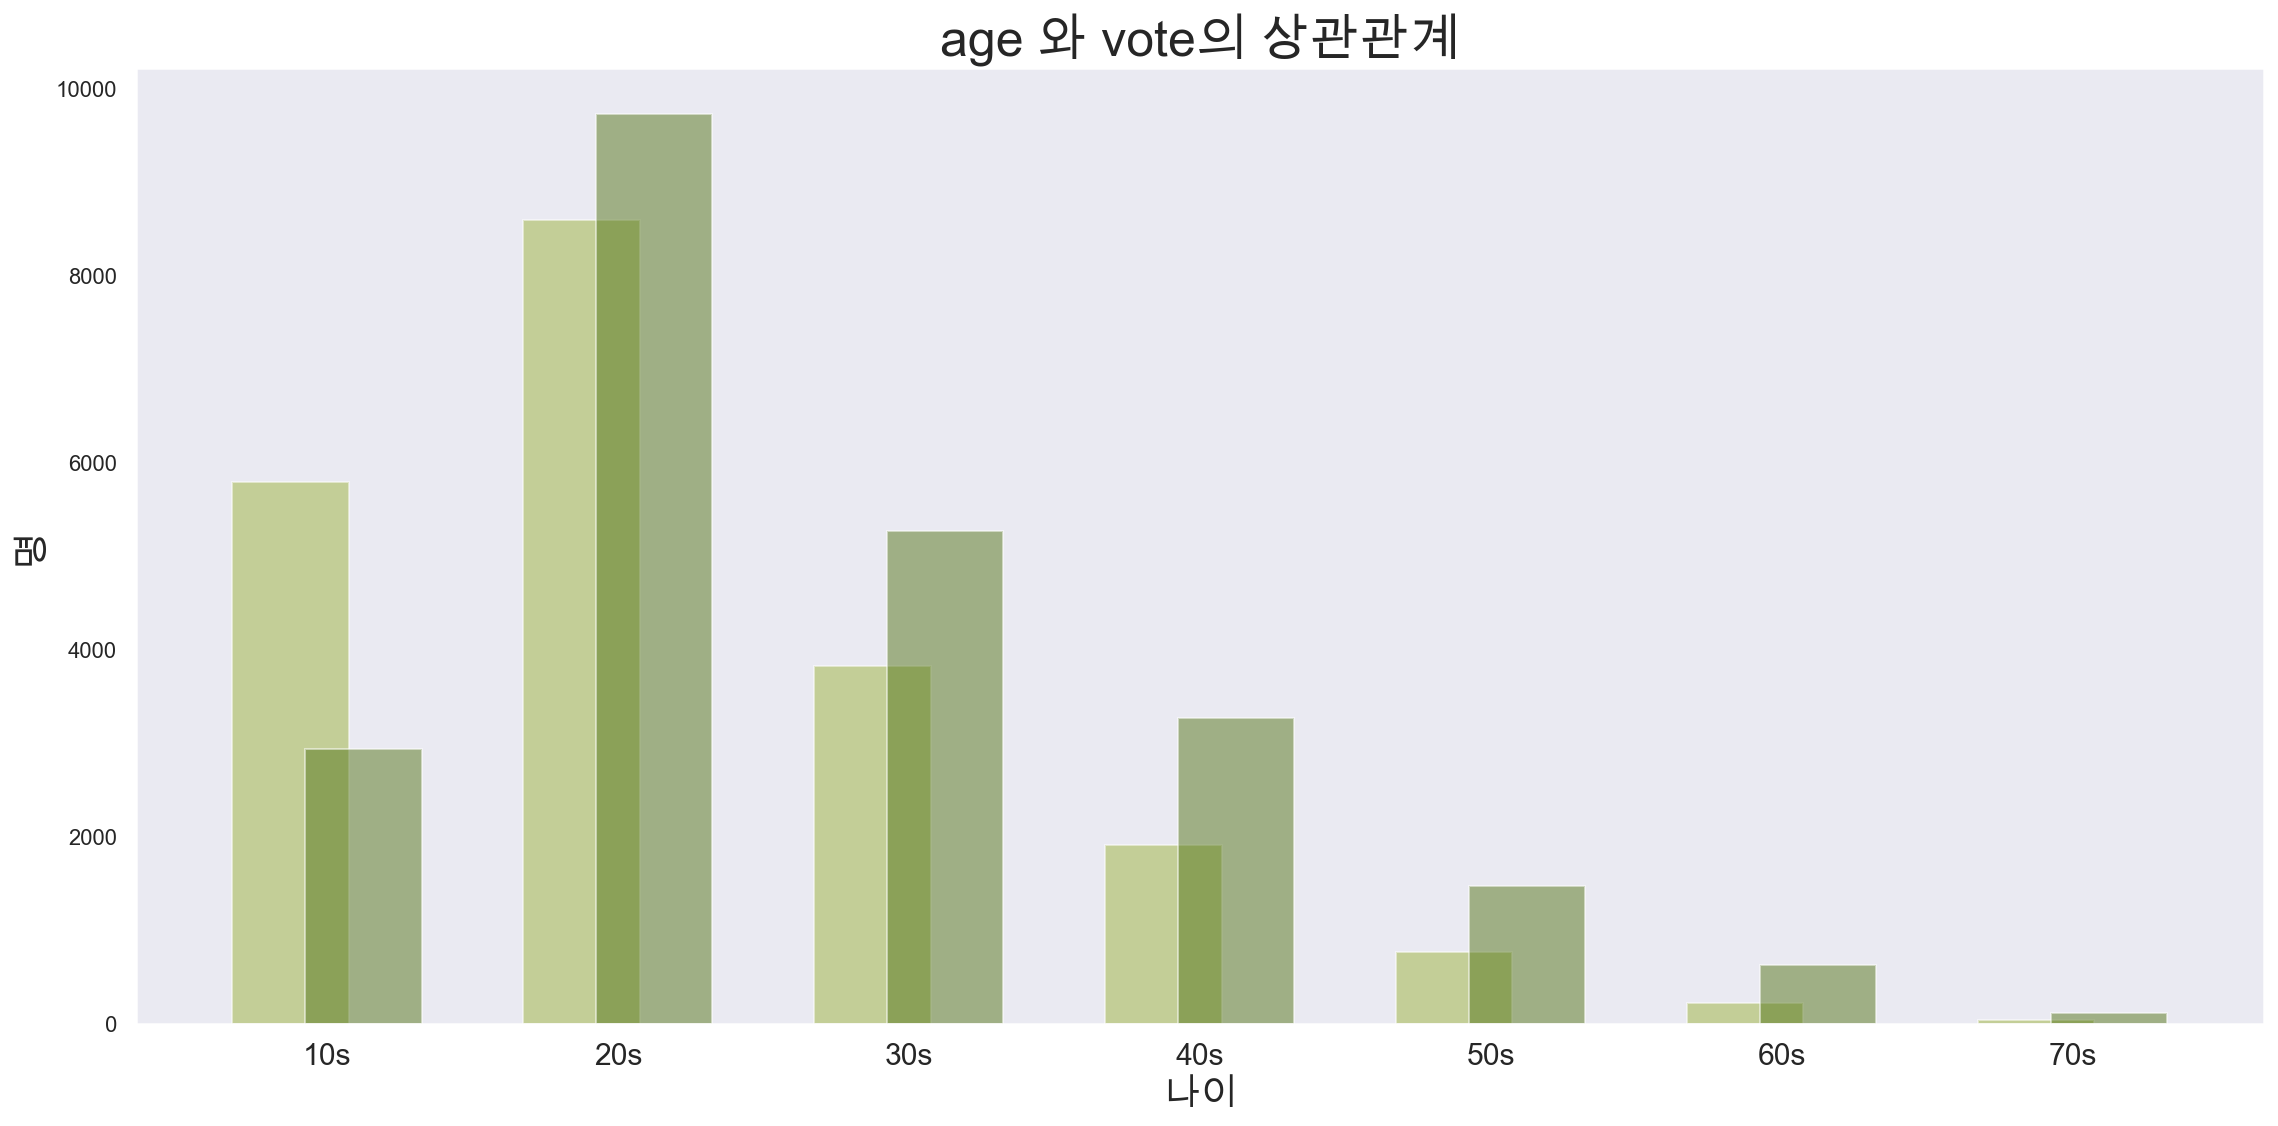

In [32]:
index = np.arange(0,7)
alpha = 0.5
plt.figure(figsize=(16, 8))

plt.bar([x*2 for x in range(len(index))], df2.No, align ="center", color ="#9db33e", alpha=alpha)
plt.bar([x*2+0.5 for x in range(len(index))], df2.Yes, align ="center", color = "#55761a", alpha=alpha)

plt.title("age 와 vote의 상관관계", fontsize=25)
plt.ylabel("명", fontsize=18)
plt.xlabel("나이", fontsize=18)
plt.xticks([x*2+0.25 for x in range(len(index))], df2.index, fontsize=15)
plt.grid(False)
#plt.legend(self.plastic_disposal_df.columns, loc="upper left")
#plt.savefig("{} 생활 폐기물 배출 총량 연도별 비교.jpg".format(name), bbox_inches="tight") 저장
plt.tight_layout()
plt.show()

In [33]:
a = list(df.columns)
pos_col = []
neg_col = []

for col in a:
    if "P" in col and "Y" not in col:
        pos_col.append(col)
    if "N" in col:
        neg_col.append(col)
        
print(pos_col, '\n', '\n', neg_col)

['Q1_TP_notell_2u', 'Q2_TP_ppl_nd_dangun', 'Q5_VP_ppl_bad', 'Q8_VP_ppl_lazy', 'Q12_TP_trust_trouble', 'Q13_VP_ppl_criminal', 'Q15_TP_abu_good', 'Q18_VP_komsu_better', 'Q19_MP_anrocksa_ok', 'Q20_VP_money_good'] 
 
 ['Q3_TN_do_moral', 'Q4_VN_ppl_good', 'Q6_TN_hnsty_best', 'Q7_TN_lying_bad', 'Q9_MN_humble_hnst', 'Q10_TN_hnstly_ask', 'Q11_VN_leader_clean', 'Q14_VN_ppl_brave', 'Q16_TN_ppl_good', 'Q17_VN_ppl_notbad']


In [4]:
b = ['score', 'v_score', 't_score', 'm_score', "voted"]

In [34]:
df2 = df[(pos_col + neg_col+b)]
df2

,Q1_TP_notell_2u,Q2_TP_ppl_nd_dangun,Q5_VP_ppl_bad,Q8_VP_ppl_lazy,Q12_TP_trust_trouble,Q13_VP_ppl_criminal,Q15_TP_abu_good,Q18_VP_komsu_better,Q19_MP_anrocksa_ok,Q20_VP_money_good,...,Q10_TN_hnstly_ask,Q11_VN_leader_clean,Q14_VN_ppl_brave,Q16_TN_ppl_good,Q17_VN_ppl_notbad,score,v_score,t_score,m_score,voted
0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,3.0,...,1.0,1.0,2.0,1.0,2.0,91.0,37.0,45.0,9.0,No
1,2.0,4.0,5.0,2.0,5.0,1.0,4.0,5.0,3.0,4.0,...,2.0,1.0,1.0,1.0,1.0,78.0,37.0,36.0,5.0,Yes
2,5.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,1.0,...,2.0,1.0,1.0,1.0,1.0,85.0,35.0,41.0,9.0,Yes
3,3.0,3.0,3.0,4.0,2.0,4.0,4.0,4.0,5.0,1.0,...,3.0,3.0,2.0,1.0,3.0,66.0,28.0,31.0,7.0,Yes
4,4.0,4.0,5.0,5.0,5.0,1.0,4.0,4.0,5.0,4.0,...,2.0,2.0,3.0,2.0,1.0,77.0,35.0,35.0,7.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44562,4.0,1.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,...,5.0,1.0,2.0,1.0,1.0,83.0,42.0,34.0,7.0,Yes
44563,5.0,5.0,3.0,2.0,2.0,5.0,4.0,5.0,5.0,5.0,...,4.0,4.0,2.0,5.0,3.0,64.0,31.0,26.0,7.0,No
44564,2.0,1.0,3.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,...,4.0,1.0,2.0,5.0,3.0,59.0,28.0,26.0,5.0,No
44565,5.0,5.0,5.0,3.0,5.0,4.0,5.0,4.0,5.0,3.0,...,1.0,1.0,1.0,3.0,3.0,90.0,37.0,43.0,10.0,No


### automl non scaler

In [35]:
from pycaret.classification import *

In [36]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data = df2, target = 'voted')

Setup Succesfully Completed!


,Description,Value
0,session_id,5753
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(44567, 25)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [37]:
# train test 7:3
(31196 + 13371)/13371

3.333108967167751

In [42]:
compare_models(exclude=['catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.5508,0.5623,0.7075,0.5571,0.6233,0.0862,0.0901,3.0851
1,Ada Boost Classifier,0.5483,0.5603,0.6814,0.5572,0.6130,0.0834,0.0859,0.7947
2,Ridge Classifier,0.5438,0.0000,0.6998,0.5518,0.6171,0.0719,0.0751,0.0139
3,Logistic Regression,0.5437,0.5558,0.7000,0.5517,0.6171,0.0717,0.0749,0.0976
4,Linear Discriminant Analysis,0.5437,0.5558,0.6997,0.5518,0.6170,0.0718,0.0750,0.0640
5,Light Gradient Boosting Machine,0.5404,0.5475,0.6811,0.5506,0.6089,0.0667,0.0690,0.2381
6,Naive Bayes,0.5307,0.5432,0.5328,0.5557,0.5440,0.0611,0.0612,0.0098
7,Extra Trees Classifier,0.5258,0.5296,0.6134,0.5431,0.5761,0.0426,0.0430,0.7210
8,Extreme Gradient Boosting,0.5247,0.5291,0.6062,0.5426,0.5726,0.0409,0.0412,3.2245
9,Quadratic Discriminant Analysis,0.5127,0.5121,0.5763,0.5343,0.5487,0.0187,0.0192,0.0159


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5753, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### gbc

In [43]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5413,0.5620,0.6986,0.5500,0.6154,0.0669,0.0699
1,0.5535,0.5715,0.7230,0.5579,0.6298,0.0904,0.0953
2,0.5699,0.5818,0.7218,0.5718,0.6381,0.1253,0.1305
3,0.5558,0.5692,0.7236,0.5597,0.6312,0.0951,0.1002
4,0.5590,0.5619,0.7041,0.5643,0.6265,0.1038,0.1077
5,0.5561,0.5608,0.7181,0.5605,0.6296,0.0963,0.1010
6,0.5332,0.5323,0.6766,0.5450,0.6037,0.0516,0.0534
7,0.5499,0.5615,0.7016,0.5569,0.6210,0.0846,0.0880
8,0.5492,0.5626,0.7143,0.5550,0.6247,0.0822,0.0863
9,0.5406,0.5589,0.6935,0.5496,0.6132,0.0658,0.0685


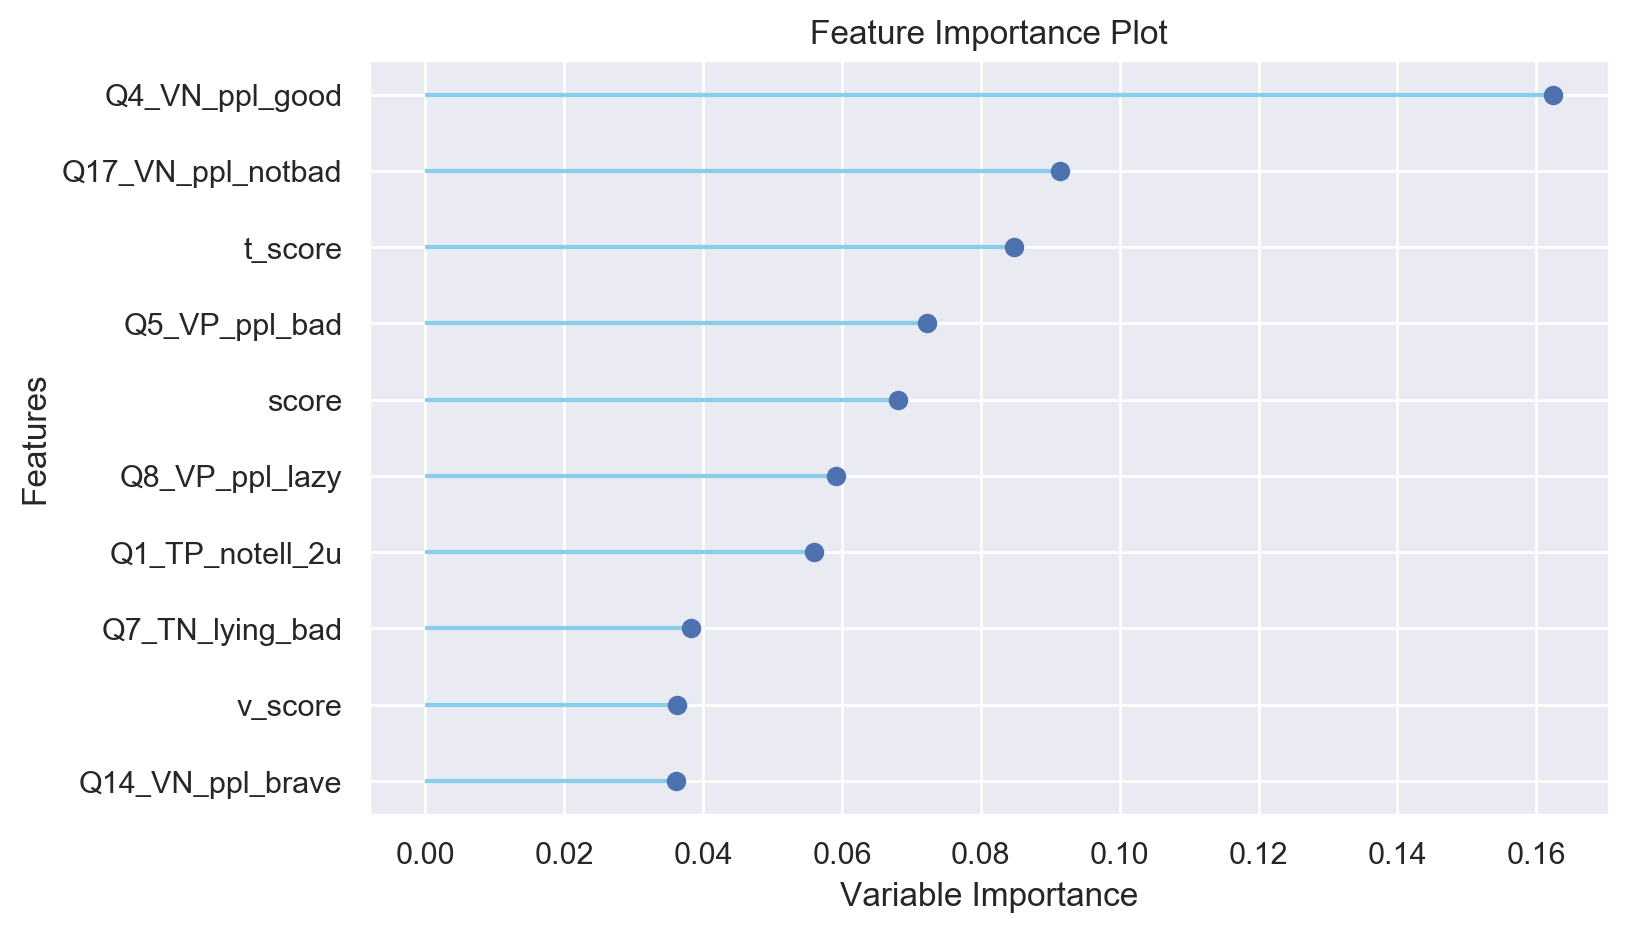

In [44]:
plot_model(estimator = gbc, plot = 'feature')

#### ada

In [45]:
ada=create_model("ada")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5404,0.5566,0.6754,0.5510,0.6069,0.0672,0.0692
1,0.5567,0.5780,0.7102,0.5618,0.6273,0.0985,0.1027
2,0.5599,0.5764,0.6998,0.5656,0.6256,0.1063,0.1099
3,0.5593,0.5697,0.6901,0.5661,0.6219,0.1059,0.1089
4,0.5388,0.5521,0.6602,0.5509,0.6006,0.0653,0.0668
5,0.5567,0.5598,0.6931,0.5635,0.6216,0.1001,0.1033
6,0.5406,0.5346,0.6705,0.5517,0.6053,0.0679,0.0698
7,0.5422,0.5608,0.6663,0.5535,0.6047,0.0718,0.0735
8,0.5492,0.5659,0.6801,0.5581,0.6131,0.0855,0.0880
9,0.5390,0.5492,0.6679,0.5503,0.6034,0.0650,0.0667


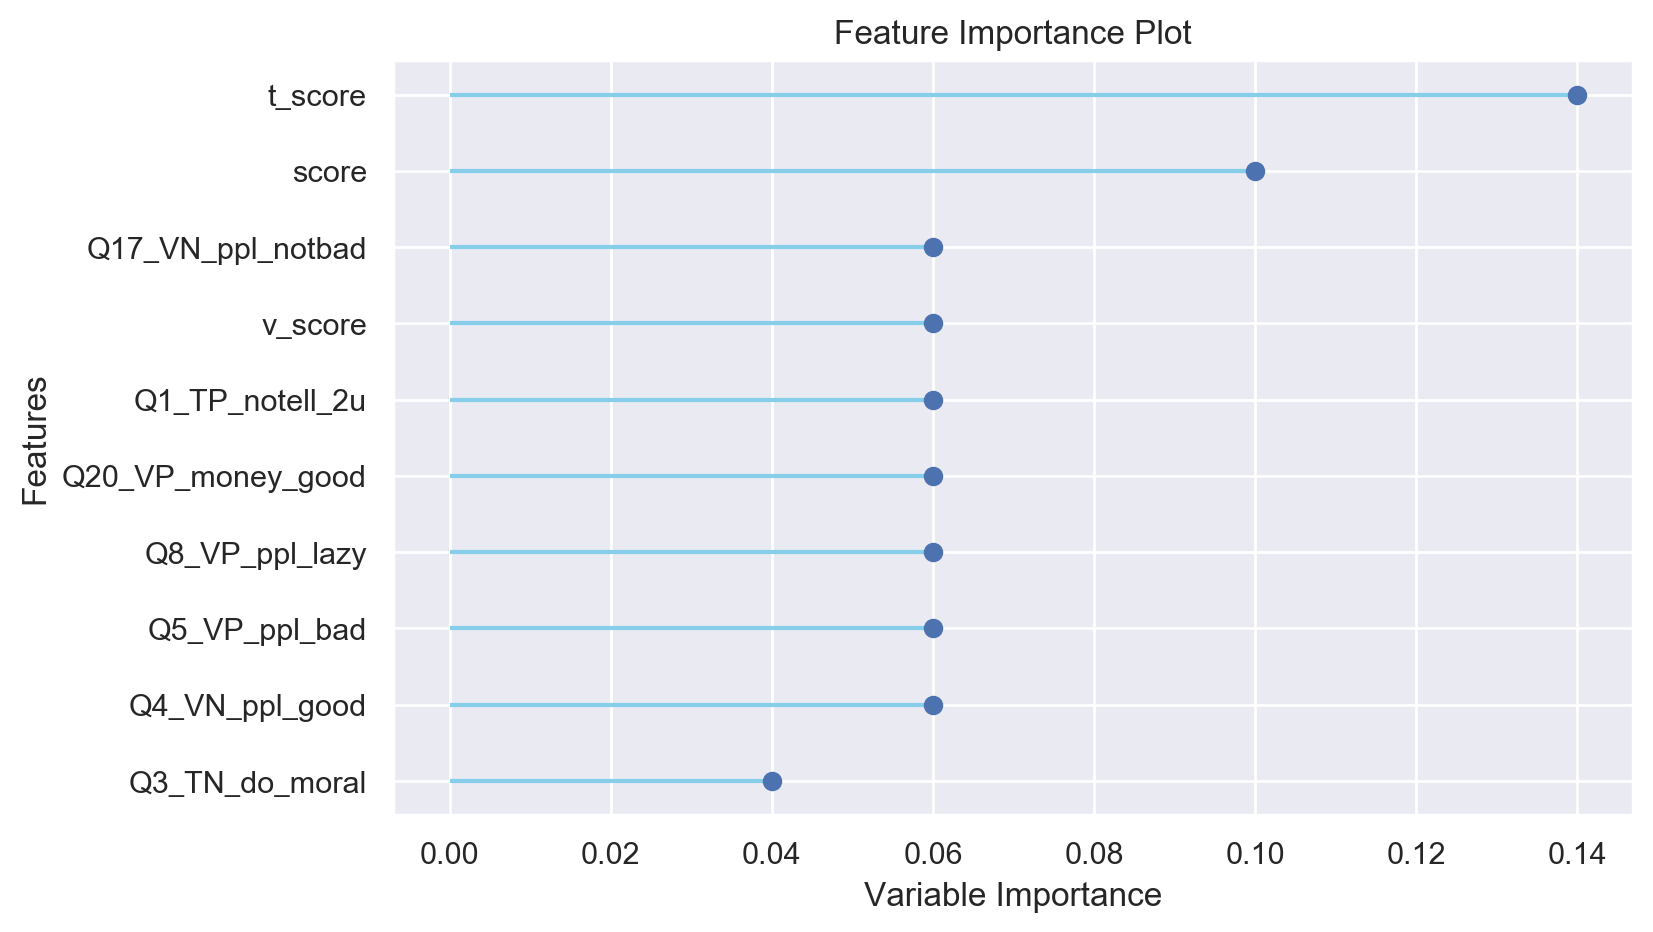

In [46]:
plot_model(estimator = ada, plot = 'feature')

#### ridge

In [47]:
ridge=create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5458,0.0000,0.6894,0.5545,0.6146,0.0773,0.0801
1,0.5436,0.0000,0.7090,0.5510,0.6201,0.0706,0.0742
2,0.5571,0.0000,0.7218,0.5609,0.6313,0.0980,0.1030
3,0.5548,0.0000,0.7090,0.5603,0.6259,0.0945,0.0986
4,0.5362,0.0000,0.6870,0.5466,0.6088,0.0571,0.0594
5,0.5455,0.0000,0.7035,0.5530,0.6192,0.0753,0.0787
6,0.5248,0.0000,0.6754,0.5382,0.5990,0.0340,0.0353
7,0.5508,0.0000,0.7071,0.5572,0.6233,0.0861,0.0899
8,0.5380,0.0000,0.7051,0.5466,0.6158,0.0592,0.0622
9,0.5409,0.0000,0.6911,0.5500,0.6126,0.0667,0.0694


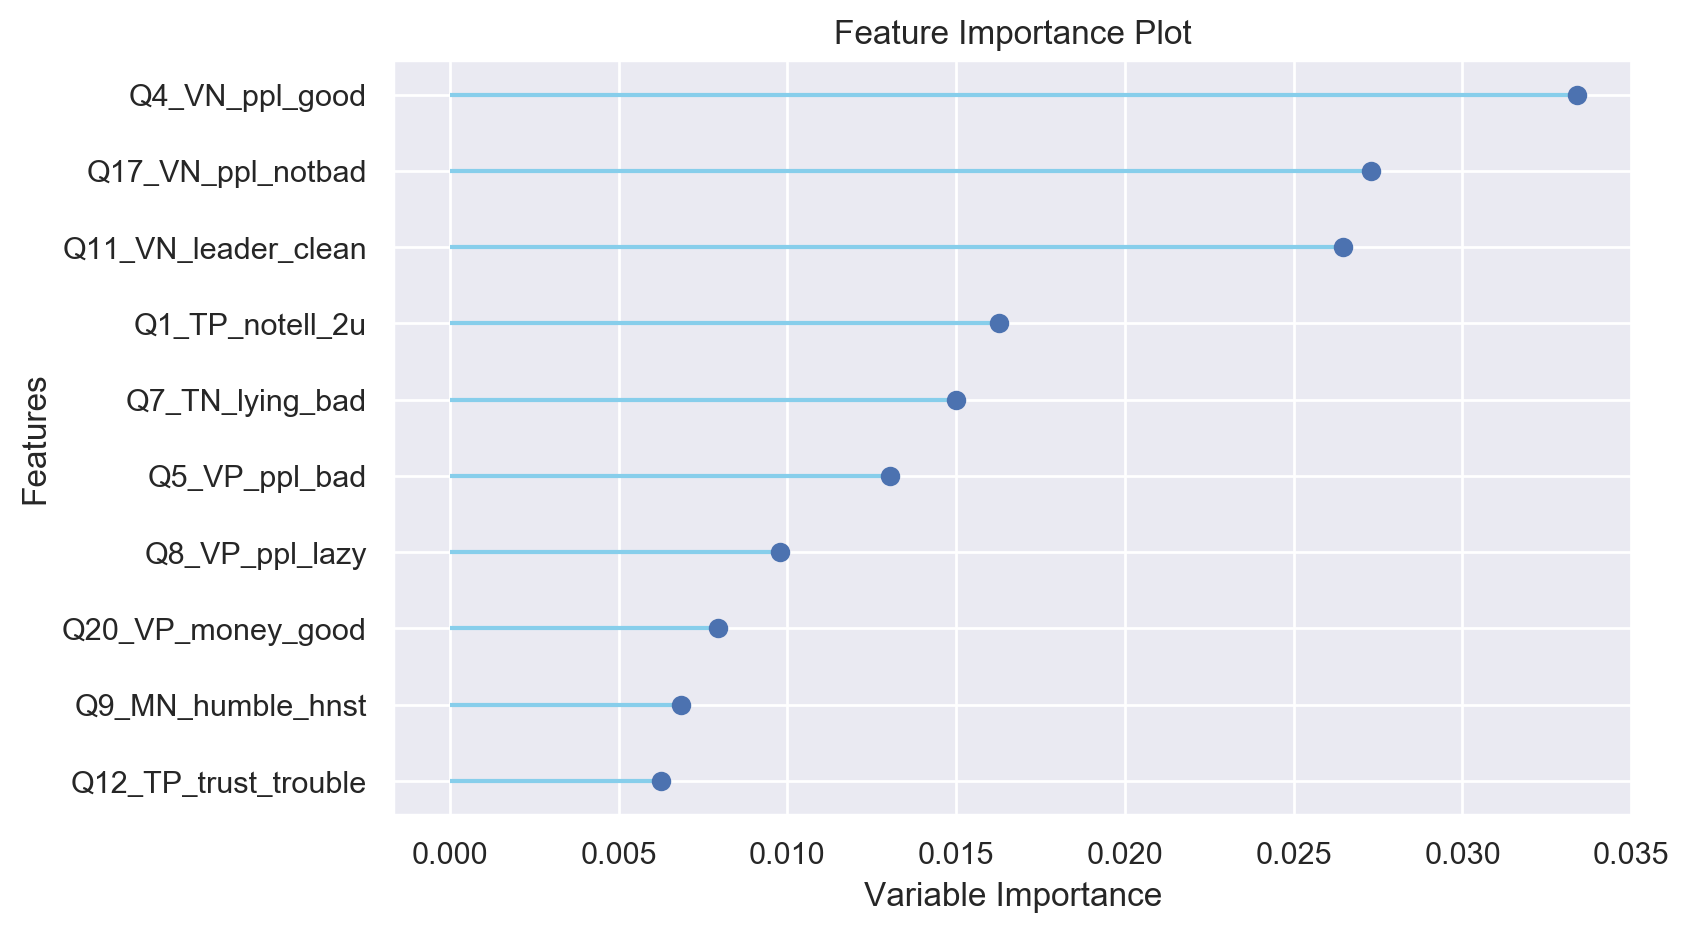

In [48]:
plot_model(estimator = ridge, plot = 'feature')

### automl 스케일 maxabs

In [51]:
from pycaret.classification import *

In [53]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data=df2, target="voted", normalize=True, normalize_method = "maxabs")

Setup Succesfully Completed!


,Description,Value
0,session_id,5364
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(44567, 25)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [54]:
# train test 7:3
(31196 + 13371)/13371

3.333108967167751

In [55]:
compare_models(exclude=['catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ada Boost Classifier,0.5470,0.5584,0.6884,0.5556,0.6149,0.0800,0.0827,0.8028
1,Gradient Boosting Classifier,0.5465,0.5610,0.7022,0.5539,0.6193,0.0775,0.0809,3.1045
2,Ridge Classifier,0.5451,0.0000,0.6983,0.5531,0.6173,0.0749,0.0780,0.0138
3,Logistic Regression,0.5450,0.5555,0.6983,0.5530,0.6172,0.0746,0.0778,0.0654
4,Linear Discriminant Analysis,0.5449,0.5554,0.6978,0.5530,0.6170,0.0745,0.0776,0.0678
5,Light Gradient Boosting Machine,0.5410,0.5526,0.6783,0.5513,0.6082,0.0683,0.0704,0.2429
6,Extra Trees Classifier,0.5315,0.5359,0.6119,0.5485,0.5784,0.0547,0.0551,0.7527
7,Extreme Gradient Boosting,0.5307,0.5363,0.6137,0.5476,0.5787,0.0530,0.0534,3.2240
8,Naive Bayes,0.5295,0.5425,0.5225,0.5556,0.5385,0.0595,0.0597,0.0097
9,SVM - Linear Kernel,0.5286,0.0000,0.7615,0.5411,0.6064,0.0327,0.0421,0.1333


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=5364)

#### ada

In [56]:
ada=create_model("ada")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5545,0.5657,0.6962,0.5612,0.6215,0.0951,0.0984
1,0.5497,0.5642,0.7029,0.5565,0.6212,0.0842,0.0877
2,0.5535,0.5598,0.6974,0.5603,0.6214,0.0929,0.0963
3,0.5529,0.5572,0.6913,0.5603,0.6190,0.0922,0.0952
4,0.5394,0.5576,0.6882,0.5492,0.6109,0.0638,0.0663
5,0.5513,0.5692,0.6907,0.5590,0.6179,0.0888,0.0918
6,0.5345,0.5473,0.6785,0.5459,0.6050,0.0542,0.0561
7,0.5444,0.5499,0.6919,0.5532,0.6148,0.0740,0.0768
8,0.5447,0.5555,0.6593,0.5561,0.6034,0.0781,0.0796
9,0.5454,0.5574,0.6880,0.5541,0.6138,0.0766,0.0793


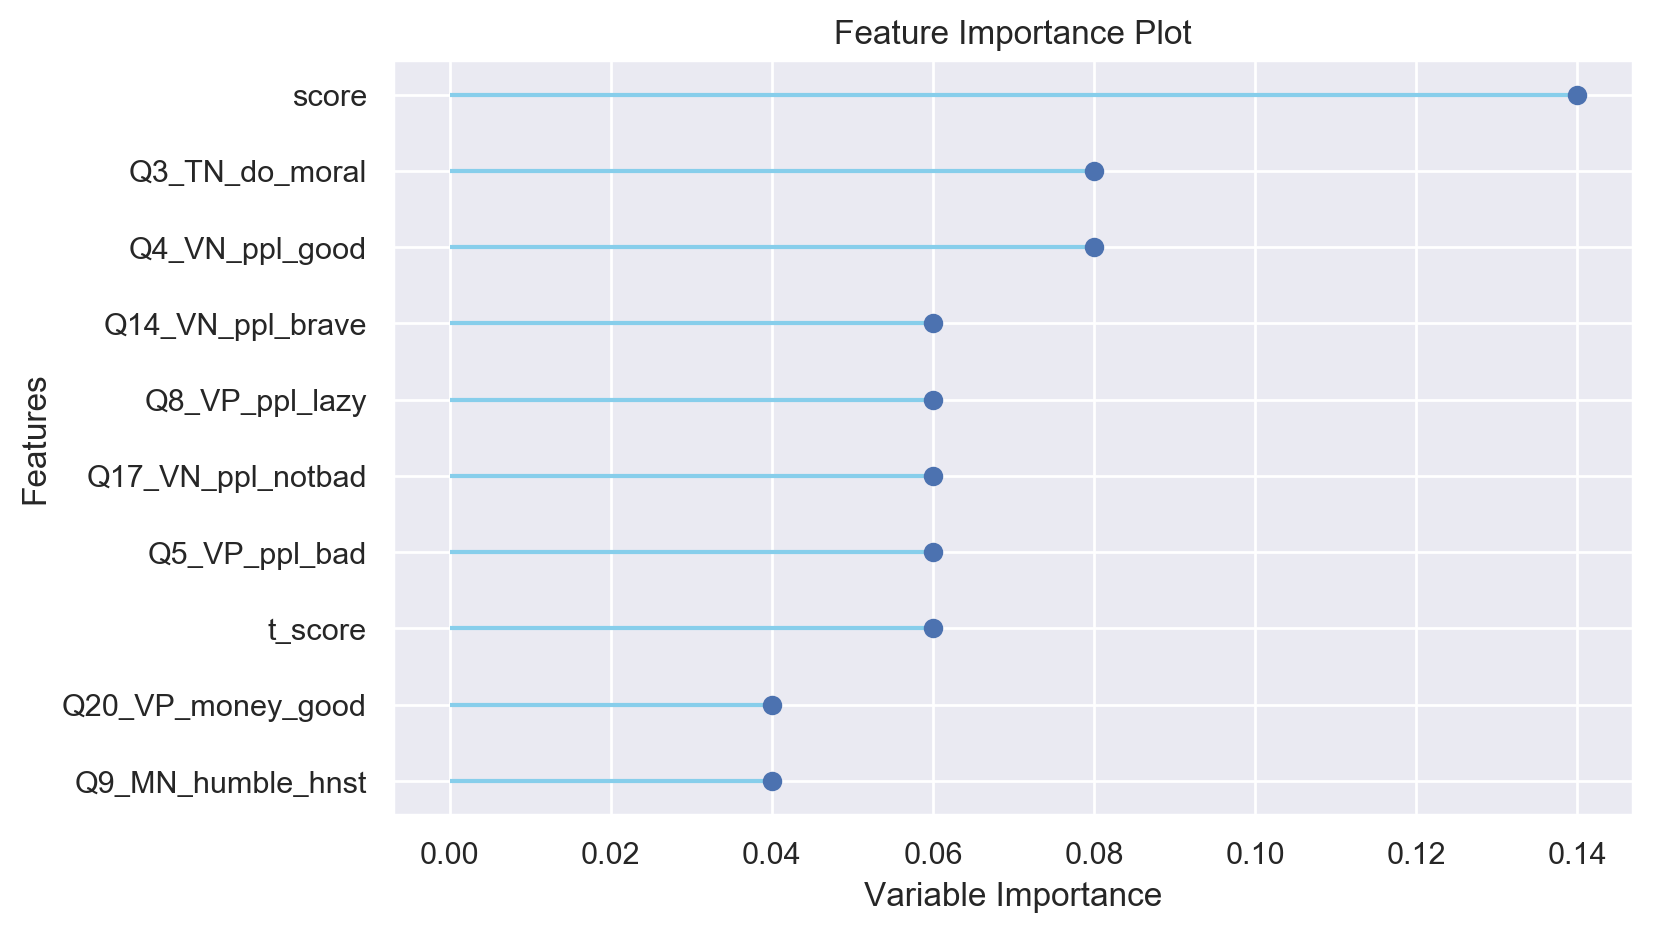

In [57]:
plot_model(estimator = ada, plot = 'feature')

#### gbc

In [58]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5551,0.5678,0.7157,0.5599,0.6283,0.0945,0.0990
1,0.5516,0.5747,0.7254,0.5561,0.6296,0.0861,0.0910
2,0.5365,0.5510,0.7047,0.5456,0.6150,0.0560,0.0590
3,0.5510,0.5593,0.7120,0.5568,0.6249,0.0860,0.0901
4,0.5385,0.5544,0.7035,0.5472,0.6156,0.0602,0.0633
5,0.5558,0.5706,0.7065,0.5613,0.6256,0.0968,0.1007
6,0.5502,0.5591,0.6901,0.5582,0.6172,0.0864,0.0893
7,0.5489,0.5603,0.7023,0.5560,0.6207,0.0825,0.0859
8,0.5390,0.5534,0.6716,0.5500,0.6047,0.0646,0.0665
9,0.5386,0.5596,0.6905,0.5482,0.6112,0.0620,0.0646


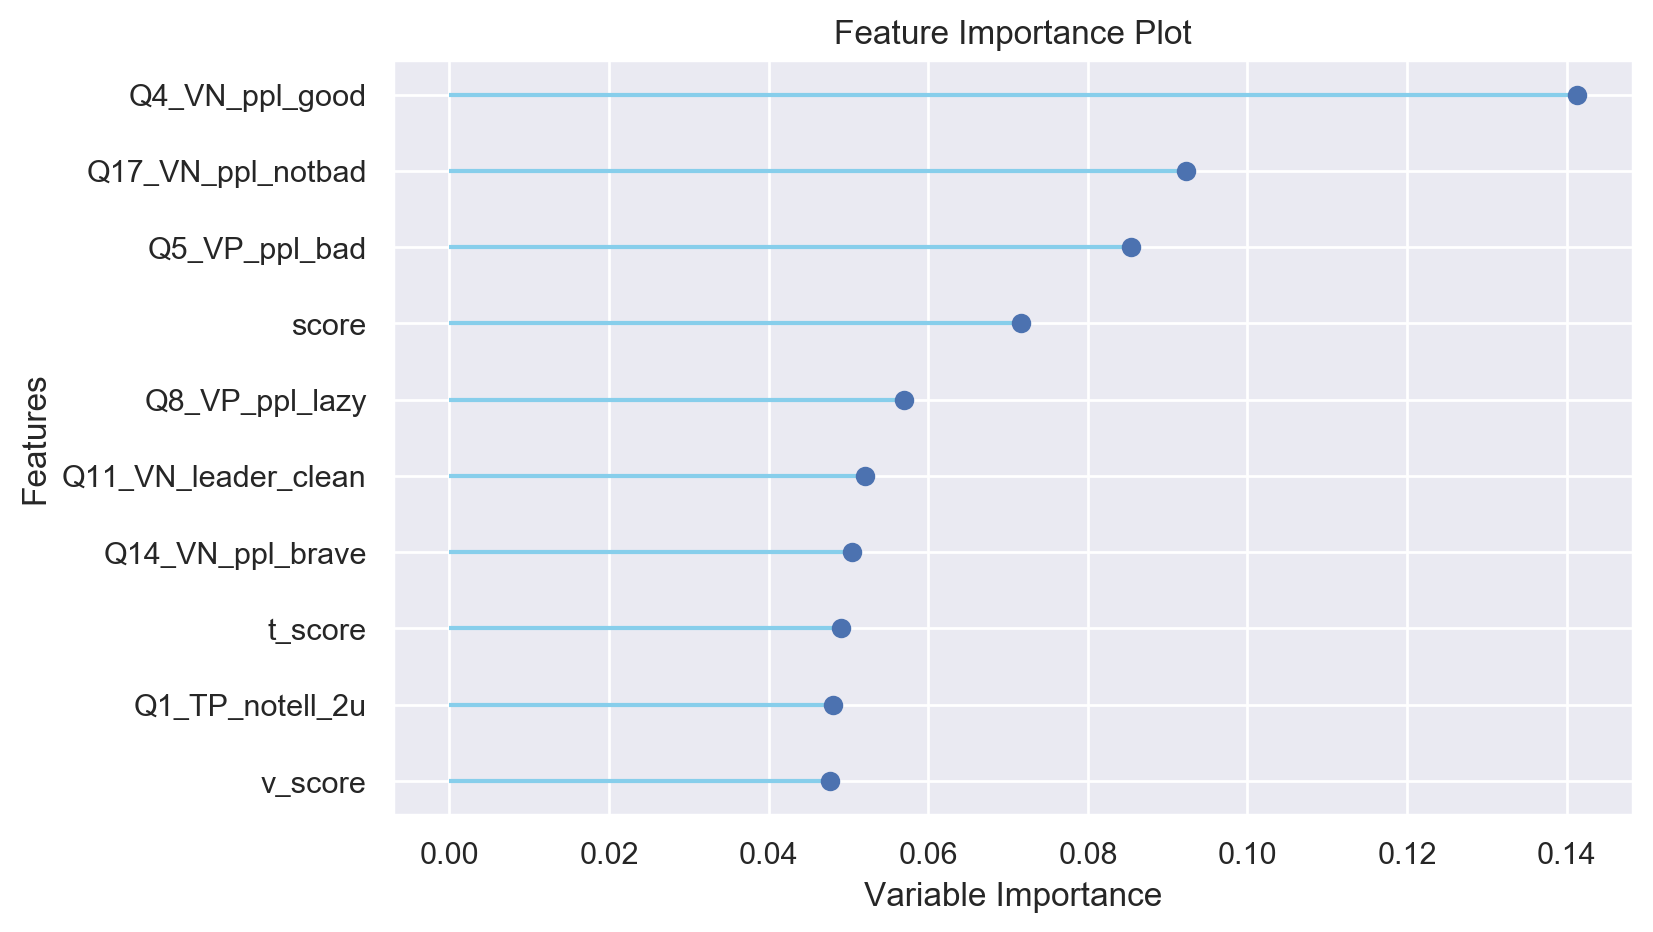

In [59]:
plot_model(estimator = gbc, plot = 'feature')

#### ridge

In [60]:
ridge=create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5446,0.0000,0.6931,0.5531,0.6152,0.0743,0.0771
1,0.5526,0.0000,0.7163,0.5577,0.6271,0.0890,0.0934
2,0.5558,0.0000,0.7077,0.5612,0.6260,0.0967,0.1007
3,0.5433,0.0000,0.6913,0.5521,0.6139,0.0717,0.0745
4,0.5404,0.0000,0.7047,0.5487,0.6170,0.0642,0.0674
5,0.5510,0.0000,0.6980,0.5580,0.6202,0.0874,0.0907
6,0.5367,0.0000,0.6962,0.5465,0.6123,0.0571,0.0598
7,0.5335,0.0000,0.6876,0.5444,0.6077,0.0512,0.0533
8,0.5444,0.0000,0.6862,0.5534,0.6127,0.0747,0.0773
9,0.5489,0.0000,0.7021,0.5558,0.6204,0.0827,0.0862


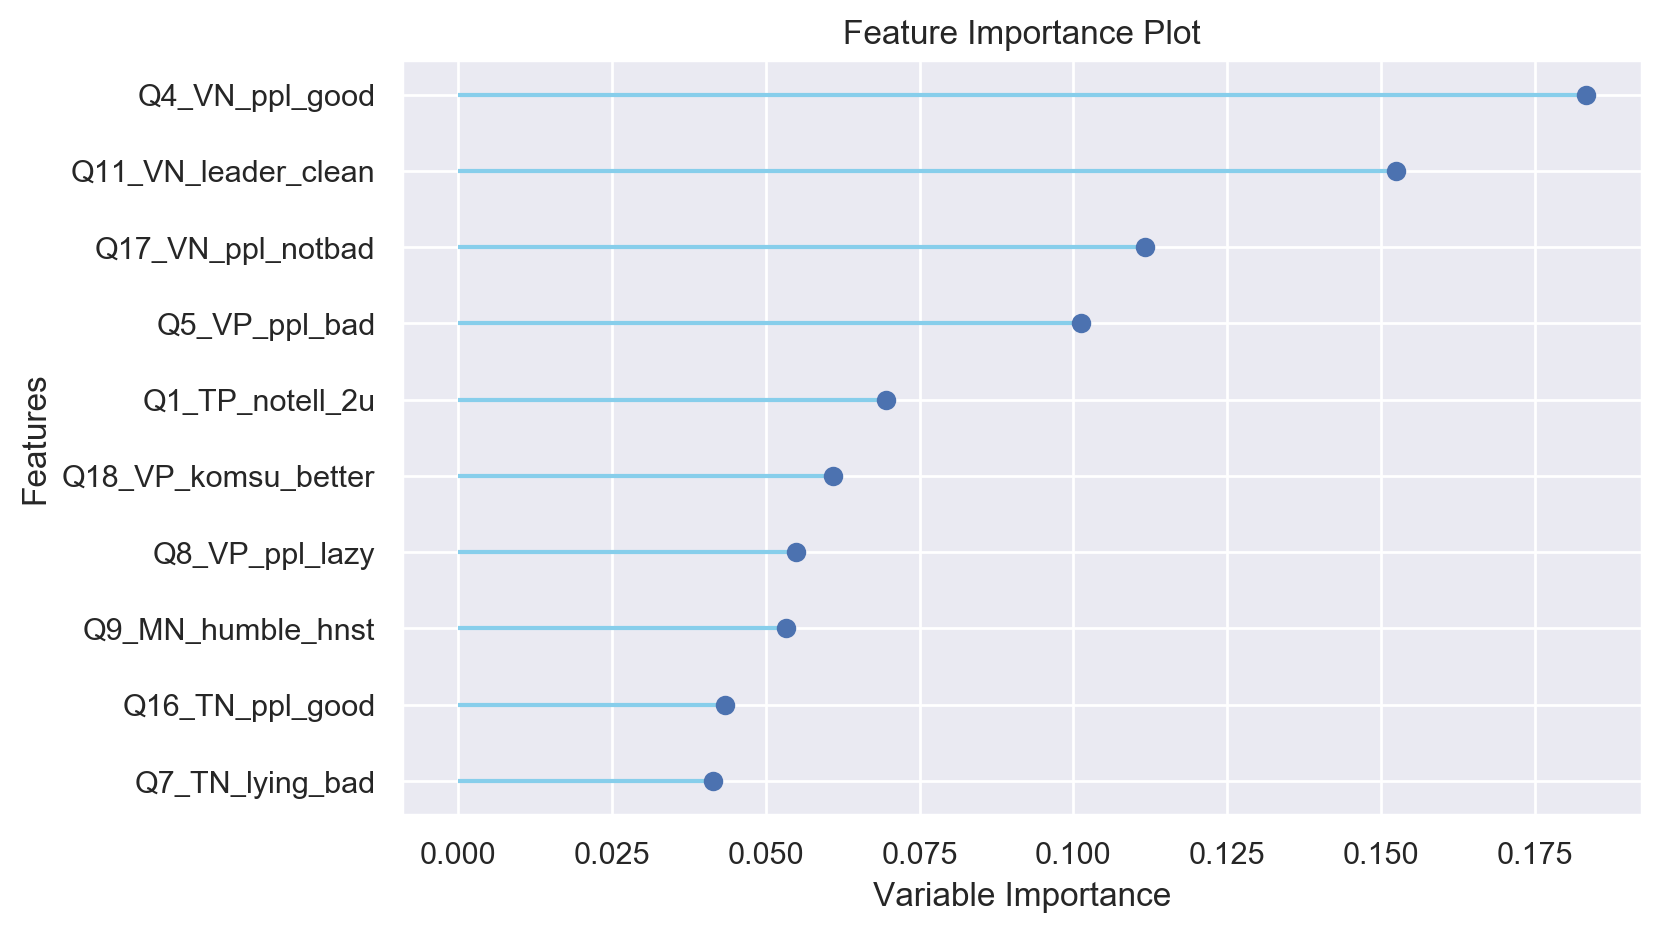

In [61]:
plot_model(estimator = ridge, plot = 'feature')

# 마키아 벨리즘 테스트 걸린 시간

In [63]:
df = pd.read_csv('../MACH_data/cut_off_by_avg_over_18age.csv')
df

,Unnamed: 0,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
0,0,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,...,Agnostic,Heterosexual,White,No,Never married,2,91.0,37.0,45.0,9.0
1,2,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,...,Christian(Protestant),Heterosexual,White,Yes,Previously married,2,78.0,37.0,36.0,5.0
2,3,5.0,13.0,9.0,5.0,7.0,5.0,2.0,19.0,9.0,...,Christian(Catholic),Homosexual,White,Yes,Never married,2,85.0,35.0,41.0,9.0
3,5,3.0,11.0,4.0,3.0,10.0,4.0,2.0,17.0,5.0,...,Atheist,Heterosexual,White,Yes,Never married,2,66.0,28.0,31.0,7.0
4,6,4.0,6.0,11.0,4.0,15.0,4.0,3.0,2.0,11.0,...,Agnostic,Heterosexual,Asian,No,Never married,1,77.0,35.0,35.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44562,53015,4.0,15.0,5.0,1.0,16.0,5.0,1.0,10.0,5.0,...,Agnostic,Homosexual,White,Yes,Never married,3,83.0,42.0,34.0,7.0
44563,53016,5.0,1.0,10.0,5.0,13.0,5.0,4.0,15.0,11.0,...,Other,Heterosexual,Asian,No,Never married,1,64.0,31.0,26.0,7.0
44564,53017,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
44565,53018,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0


In [66]:
a = list(df.columns)
datas = []


for col in a:
    if "E" in col:
        datas.append(col)
        
print(datas)

['Q1E_notell_2u', 'Q2E_ppl_nd_dangun', 'Q3E_do_moral', 'Q4E_ppl_good', 'Q5E_ppl_bad', 'Q6E_hnsty_best', 'Q7E_lying_bad', 'Q8E_ppl_lazy', 'Q9E_humble_hnst', 'Q10E_hnstly_ask', 'Q11E_leader_clean', 'Q12E_trust_trouble', 'Q13E_ppl_criminal', 'Q14E_ppl_brave', 'Q15E_abu_good', 'Q16E_ppl_good', 'Q17E_ppl_notbad', 'Q18E_komsu_better', 'Q19E_anrocksa_ok', 'Q20E_money_good']


In [67]:
len(datas)

20

In [87]:
df1 = df[(datas+["voted"])]
df1

,Q1E_notell_2u,Q2E_ppl_nd_dangun,Q3E_do_moral,Q4E_ppl_good,Q5E_ppl_bad,Q6E_hnsty_best,Q7E_lying_bad,Q8E_ppl_lazy,Q9E_humble_hnst,Q10E_hnstly_ask,...,Q12E_trust_trouble,Q13E_ppl_criminal,Q14E_ppl_brave,Q15E_abu_good,Q16E_ppl_good,Q17E_ppl_notbad,Q18E_komsu_better,Q19E_anrocksa_ok,Q20E_money_good,voted
0,4.0,8.0,6.0,6.0,7.0,3.0,11.0,5.0,16.0,9.0,...,3.0,6.0,6.0,4.0,5.0,8.0,4.0,14.0,13.0,No
1,9.0,10.0,10.0,4.0,17.0,5.0,6.0,6.0,11.0,17.0,...,7.0,15.0,3.0,6.0,5.0,18.0,7.0,13.0,14.0,Yes
2,9.0,5.0,9.0,4.0,32.0,8.0,20.0,10.0,10.0,14.0,...,16.0,24.0,7.0,6.0,5.0,24.0,7.0,11.0,22.0,Yes
3,4.0,4.0,5.0,2.0,7.0,3.0,4.0,2.0,5.0,5.0,...,4.0,3.0,2.0,3.0,3.0,2.0,4.0,2.0,4.0,Yes
4,11.0,4.0,11.0,9.0,10.0,5.0,7.0,5.0,7.0,13.0,...,7.0,36.0,8.0,4.0,4.0,10.0,8.0,6.0,14.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44562,5.0,5.0,5.0,3.0,13.0,1.0,8.0,8.0,10.0,7.0,...,7.0,6.0,3.0,4.0,4.0,7.0,1.0,22.0,10.0,Yes
44563,10.0,5.0,11.0,5.0,16.0,4.0,5.0,7.0,12.0,24.0,...,7.0,20.0,4.0,22.0,4.0,27.0,16.0,8.0,20.0,No
44564,10.0,14.0,25.0,13.0,46.0,20.0,31.0,20.0,24.0,30.0,...,7.0,20.0,15.0,19.0,6.0,47.0,17.0,62.0,38.0,No
44565,6.0,4.0,7.0,5.0,10.0,5.0,5.0,13.0,7.0,15.0,...,4.0,15.0,5.0,3.0,8.0,147.0,4.0,12.0,15.0,No


In [107]:
df1.iloc[:,0].unique()

array([4.000e+00, 9.000e+00, 1.100e+01, 5.000e+00, 8.000e+00, 3.600e+01,
       1.000e+01, 1.800e+01, 3.000e+00, 1.200e+01, 6.000e+00, 1.700e+01,
       2.000e+01, 2.000e+00, 7.000e+00, 1.400e+01, 1.300e+01, 1.600e+01,
       2.100e+01, 2.200e+01, 1.900e+01, 2.900e+01, 2.500e+01, 1.500e+01,
       8.100e+01, 4.400e+01, 2.700e+01, 2.400e+01, 4.200e+01, 5.500e+01,
       4.500e+01, 5.200e+01, 3.300e+01, 2.300e+01, 2.600e+01, 1.200e+02,
       1.330e+02, 2.800e+01, 1.000e+00, 4.100e+01, 4.000e+01, 3.700e+01,
       4.600e+01, 3.500e+01, 3.840e+02, 3.100e+01, 1.300e+02, 3.900e+01,
       4.300e+01, 3.400e+01, 5.000e+01, 7.000e+01, 9.300e+01, 8.400e+01,
       3.200e+01, 2.790e+02, 7.600e+01, 1.550e+02, 3.120e+02, 7.300e+01,
       6.700e+01, 3.800e+01, 5.300e+01, 4.900e+01, 5.400e+01, 1.040e+02,
       9.100e+01, 7.800e+01, 1.290e+02, 3.000e+01, 8.600e+01, 4.700e+01,
       6.900e+01, 6.600e+01, 5.800e+01, 1.240e+02, 4.800e+01, 9.700e+01,
       1.310e+02, 8.000e+01, 5.700e+01, 7.100e+01, 

In [95]:
np.median(df1.iloc[:,0])

7.0